In [1]:
import numpy as np
import os
import glob
from sklearn.model_selection import train_test_split
import tensorflow as tf
from random import randint
import matplotlib.pyplot as plt
%matplotlib inline  
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
with open('./npy/classes.txt', 'r') as f:
    class_names = [line.strip() for line in f.readlines()]

In [3]:
def load_data(root, vfold_ratio=0.1, max_items_per_class=40000):
    all_files = glob.glob(os.path.join(root, '*.npy'))

    #initialize variables 
    x = np.empty([0, 784])
    y = np.empty([0])
    class_names = []

    #load each data file 
    for idx, file in enumerate(all_files):
        print(idx)
        print(file)
        data = np.load(file)
        data = data[0: max_items_per_class, :]
        labels = np.full(data.shape[0], idx)

        x = np.concatenate((x, data), axis=0)
        y = np.append(y, labels)

        class_name, ext = os.path.splitext(os.path.basename(file))
        class_names.append(class_name)

    data = None
    labels = None
    
    #randomize the dataset 
    permutation = np.random.permutation(y.shape[0])
    x = x[permutation, :]
    y = y[permutation]

    #separate into training and testing 
    vfold_size = int(x.shape[0]/100*(vfold_ratio*100))

    x_test = x[0:vfold_size, :]
    y_test = y[0:vfold_size]

    x_train = x[vfold_size:x.shape[0], :]
    y_train = y[vfold_size:y.shape[0]]
    return x_train, y_train, x_test, y_test, class_names

In [4]:
x_train, y_train, x_test, y_test, class_names = load_data('npy/data')
num_classes = len(class_names)
image_size = 28

0
npy/data/baseball_bat.npy
1
npy/data/lollipop.npy
2
npy/data/binoculars.npy
3
npy/data/garden.npy
4
npy/data/basket.npy
5
npy/data/penguin.npy
6
npy/data/canoe.npy
7
npy/data/eyeglasses.npy
8
npy/data/beach.npy
9
npy/data/screwdriver.npy
10
npy/data/mouse.npy
11
npy/data/apple.npy
12
npy/data/van.npy
13
npy/data/grapes.npy
14
npy/data/grass.npy
15
npy/data/watermelon.npy
16
npy/data/moon.npy
17
npy/data/zigzag.npy
18
npy/data/nail.npy
19
npy/data/leg.npy
20
npy/data/rollerskates.npy
21
npy/data/goatee.npy
22
npy/data/cup.npy
23
npy/data/anvil.npy
24
npy/data/suitcase.npy
25
npy/data/chair.npy
26
npy/data/drill.npy
27
npy/data/house_plant.npy
28
npy/data/peanut.npy
29
npy/data/squirrel.npy
30
npy/data/matches.npy
31
npy/data/sword.npy
32
npy/data/cat.npy
33
npy/data/toe.npy
34
npy/data/snorkel.npy
35
npy/data/pond.npy
36
npy/data/calculator.npy
37
npy/data/school_bus.npy
38
npy/data/airplane.npy
39
npy/data/squiggle.npy
40
npy/data/blackberry.npy
41
npy/data/ear.npy
42
npy/data/aircra

In [5]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

12420000
12420000
1380000
1380000


[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  27. 112.  22.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.  28. 219. 255. 214.   7.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   8.  37.  33.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   3. 210. 236. 108. 253. 130.   0.   0.
    0.   0.   0.  15.  75. 138. 201. 251. 255. 254.  98.  33.   5.   0.]
 [  0.   0.   0.   0.   0.   0.  95. 255.  74.   0. 160. 240.  13.  24.
   78. 141. 204. 252. 255. 244. 186. 124. 114. 181. 220. 255. 102.   0.]
 [  0.   0.   0.   0.   0.   5. 221. 196.  37. 191. 211. 255. 253. 255.
  255. 242. 182. 120.  57.  47. 128. 213. 255. 250. 183.  

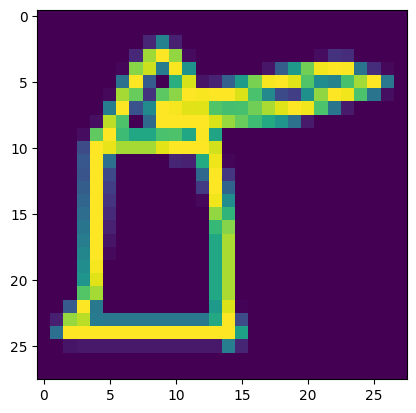

In [7]:
idx = randint(0, len(x_train))
print(x_train[idx].reshape(28,28))
plt.imshow(x_train[idx].reshape(28,28)) 
print(class_names[int(y_train[idx].item())])

In [8]:
x_train = x_train.reshape(x_train.shape[0], image_size, image_size, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], image_size, image_size, 1).astype('float32')

In [9]:
x_train /= 255.0
x_test /= 255.0

In [10]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

/Users/annakramar/UCC/AI/artificial_intelligence_2023_2024/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [11]:
x_train.shape

(12420000, 28, 28, 1)

In [12]:
CNN_model = Sequential()

CNN_model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:], activation='relu'))
CNN_model.add(BatchNormalization())
CNN_model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
CNN_model.add(BatchNormalization())
CNN_model.add(MaxPooling2D(pool_size=(2, 2)))

CNN_model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
CNN_model.add(BatchNormalization())
CNN_model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
CNN_model.add(BatchNormalization())
CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
CNN_model.add(Dropout(0.1))

CNN_model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
CNN_model.add(BatchNormalization())
CNN_model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
CNN_model.add(BatchNormalization())
CNN_model.add(MaxPooling2D(pool_size=(2, 2)))

CNN_model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
CNN_model.add(BatchNormalization())
CNN_model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
CNN_model.add(BatchNormalization())
CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
CNN_model.add(Dropout(0.1))

CNN_model.add(Flatten())
CNN_model.add(Dense(512, activation='relu'))
CNN_model.add(Dropout(0.1))
CNN_model.add(Dense(345, activation='softmax'))

optimizer = Adam(learning_rate=0.001)
CNN_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['top_k_categorical_accuracy'])

print(CNN_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 28, 28, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                        

In [13]:
history = CNN_model.fit(x = x_train, y = y_train, 
                    validation_split=0.1, batch_size = 256, 
                    verbose=2, epochs=40, 
                    callbacks=[EarlyStopping(monitor="val_loss", patience=4, restore_best_weights=True)])

Epoch 1/40
43665/43665 - 7806s - loss: 1.3418 - top_k_categorical_accuracy: 0.8816 - val_loss: 1.1048 - val_top_k_categorical_accuracy: 0.9106 - 7806s/epoch - 179ms/step
Epoch 2/40
43665/43665 - 7697s - loss: 1.1170 - top_k_categorical_accuracy: 0.9094 - val_loss: 1.0508 - val_top_k_categorical_accuracy: 0.9162 - 7697s/epoch - 176ms/step
Epoch 3/40
43665/43665 - 7675s - loss: 1.0686 - top_k_categorical_accuracy: 0.9146 - val_loss: 1.0146 - val_top_k_categorical_accuracy: 0.9200 - 7675s/epoch - 176ms/step
Epoch 4/40
43665/43665 - 7678s - loss: 1.0425 - top_k_categorical_accuracy: 0.9175 - val_loss: 1.0054 - val_top_k_categorical_accuracy: 0.9208 - 7678s/epoch - 176ms/step
Epoch 5/40
43665/43665 - 7678s - loss: 1.0256 - top_k_categorical_accuracy: 0.9192 - val_loss: 0.9940 - val_top_k_categorical_accuracy: 0.9219 - 7678s/epoch - 176ms/step
Epoch 6/40
43665/43665 - 7657s - loss: 1.0134 - top_k_categorical_accuracy: 0.9205 - val_loss: 0.9898 - val_top_k_categorical_accuracy: 0.9224 - 7657s

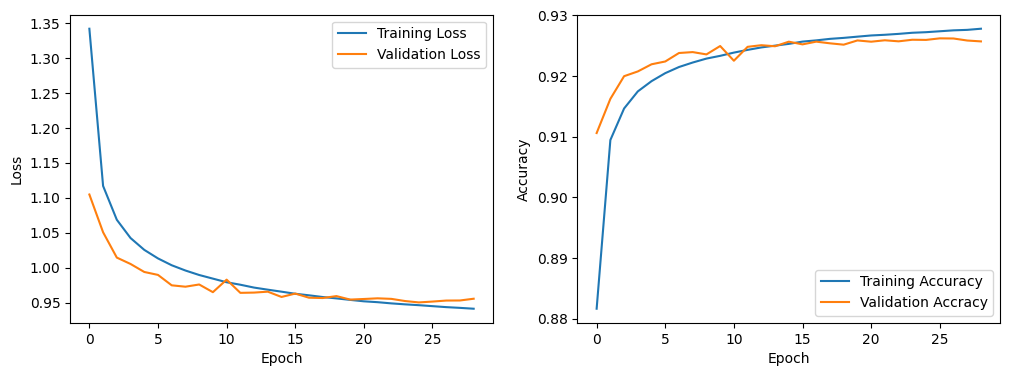

In [14]:
# Extract training history
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['top_k_categorical_accuracy']
val_accuracy = history.history['val_top_k_categorical_accuracy']

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [15]:
score = CNN_model.evaluate(x_test, y_test, verbose=0)
print('Test accuarcy: {:0.2f}%'.format(score[1] * 100))

Test accuarcy: 92.63%


In [26]:
predictions = CNN_model.predict(x_test)

43125/43125 [==============================] - 380s 9ms/step


In [27]:
predicted_classes = np.argmax(predictions, axis=1)

In [28]:
true_classes = np.argmax(y_test, axis=1)

In [30]:
from sklearn.metrics import f1_score, roc_auc_score

In [31]:
f1 = f1_score(true_classes, predicted_classes, average='macro')
print(f"F1 Score (Macro): {f1:.4f}")

F1 Score (Macro): 0.7586


In [32]:
from sklearn.preprocessing import label_binarize

In [33]:
n_classes = y_test.shape[1]
y_test_binarized = label_binarize(true_classes, classes=[*range(n_classes)])

In [34]:
auc = roc_auc_score(y_test_binarized, predictions, multi_class='ovr')
print(f"AUC (One-vs-Rest): {auc:.4f}")

AUC (One-vs-Rest): 0.9955


In [39]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, RocCurveDisplay
import itertools

In [41]:
n_classes = y_test.shape[1]
y_test_binarized = label_binarize(np.argmax(y_test, axis=1), classes=[*range(n_classes)])

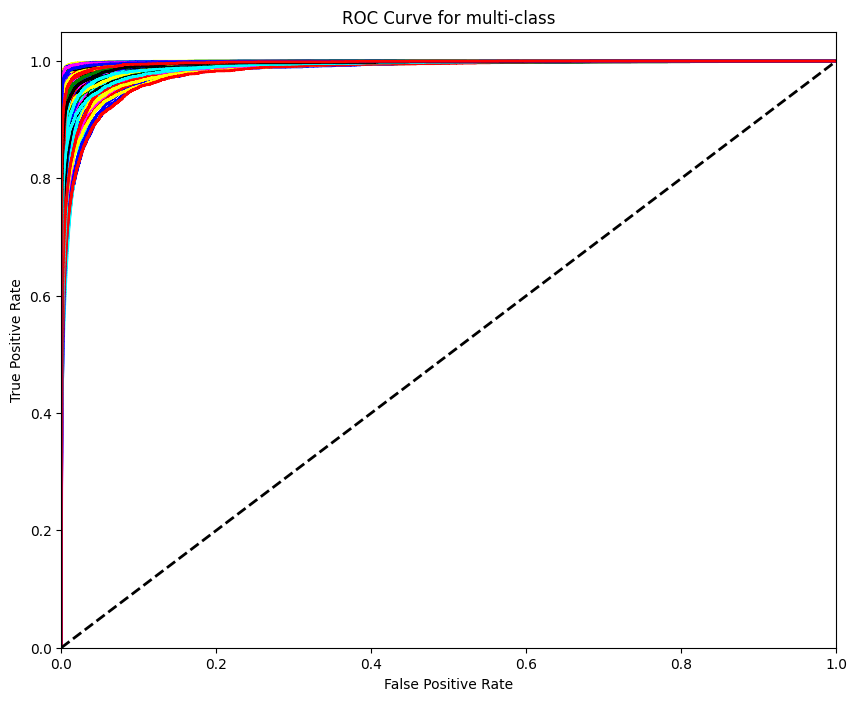

In [46]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting all ROC curves
plt.figure(figsize=(10, 8))
colors = itertools.cycle(['blue', 'red', 'green', 'yellow', 'cyan', 'magenta', 'black'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for multi-class')
plt.savefig('ROC_Curve.png', format='png', dpi=300)  # Save as PNG with high resolution
plt.savefig('ROC_Curve.pdf', format='pdf', dpi=300)
plt.show()

In [25]:
RNN_model = Sequential()

RNN_model.add(LSTM(64, return_sequences=True, input_shape=x_train.shape[1:])
RNN_model.add(Dropout(0.1))

RNN_model.add(LSTM(128, return_sequences=True))
RNN_model.add(LSTM(256, return_sequences=True))
RNN_model.add(Dropout(0.1))

RNN_model.add(LSTM(512, return_sequences=True))
RNN_model.add(LSTM(256, return_sequences=True))
RNN_model.add(Dropout(0.1))

RNN_model.add(LSTM(128, return_sequences=True))
RNN_model.add(LSTM(256, return_sequences=True))
RNN_model.add(Dropout(0.1))

RNN_model.add(LSTM(128)) 
RNN_model.add(Dropout(0.1))

RNN_model.add(Dense(512, activation='relu'))
RNN_model.add(Dropout(0.1))

RNN_model.add(Dense(345, activation='softmax'))

optimizer = Adam(learning_rate=0.001)
RNN_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

print(RNN_model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 64)           19200     
                                                                 
 dropout_8 (Dropout)         (None, 100, 64)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 128)          98816     
                                                                 
 lstm_6 (LSTM)               (None, 100, 256)          394240    
                                                                 
 dropout_9 (Dropout)         (None, 100, 256)          0         
                                                                 
 lstm_7 (LSTM)               (None, 100, 512)          1574912   
                                                                 
 lstm_8 (LSTM)               (None, 100, 256)         

In [ ]:
history = RNN_model.fit(x = x_train, y = y_train, 
                    validation_split=0.1, batch_size = 256, 
                    verbose=2, epochs=40, 
                    callbacks=[EarlyStopping(monitor="val_loss", patience=4, restore_best_weights=True)])

In [ ]:
# Extract training history
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['top_k_categorical_accuracy']
val_accuracy = history.history['val_top_k_categorical_accuracy']

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
score = RNN_model.evaluate(x_test, y_test, verbose=0)
print('Test accuarcy: {:0.2f}%'.format(score[1] * 100))

In [19]:
CNN_model.save('CNN_model')

INFO:tensorflow:Assets written to: CNN_model/assets


INFO:tensorflow:Assets written to: CNN_model/assets


In [20]:
converter = tf.lite.TFLiteConverter.from_saved_model('CNN_model')

In [21]:
tflite_model = converter.convert()

2024-04-16 12:53:15.996364: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2024-04-16 12:53:15.996385: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2024-04-16 12:53:15.999410: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: CNN_model
2024-04-16 12:53:16.001883: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-04-16 12:53:16.001888: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: CNN_model
2024-04-16 12:53:16.008476: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled
2024-04-16 12:53:16.010891: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2024-04-16 12:53:16.110275: I tensorflow/cc/saved_model/loader.cc:217] Running initialization op on SavedModel bundle at path: CNN_model
2024-04-16 12:53:16.132783: 

In [22]:
with open('CNN_model.tflite', 'wb') as f:
    f.write(tflite_model)